
# SWMAL Exercise


## Model capacity and under/overfitting

NOTE: text and code to the exercise taken from

* https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions.

The plot below shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees.

We can see that a linear function (polynomial with degree 1) is not sufficient to fit the
training samples.  This is called **underfitting**.

A polynomial of degree four approximates the true function almost perfectly. However, for higher degrees the model will **overfit** the training data, i.e. it learns the noise of the
training data.

We evaluate quantitatively **overfitting**/**underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.

### Qa) Explain the polynomial fitting via code review

Review the code below, write a __short__ code review summary, and explain how the polynomial fitting is implemented?

NOTE: Do not dig into the plotting details (its unimportant compared to the rest of the code), but just explain the outcome of the plots.

Iterating...degrees= [1, 4, 15]
  degree=   1, score_mean=-0.41,  PolynomialFeatures(degree=1, include_bias=False)
    CV sub-scores:  mean = -0.41,  std = 0.43
      CV fold 0  =>  score = -1.2
      CV fold 1  =>  score = -0.2
      CV fold 2  =>  score = -0.044
      CV fold 3  =>  score = -0.36
      CV fold 4  =>  score = -0.28
      CV fold 5  =>  score = -0.3
      CV fold 6  =>  score = -0.18
      CV fold 7  =>  score = -0.0086
      CV fold 8  =>  score = -0.25
      CV fold 9  =>  score = -1.3
  degree=   4, score_mean=-0.04,  PolynomialFeatures(degree=4, include_bias=False)
    CV sub-scores:  mean = -0.043,  std = 0.071
      CV fold 0  =>  score = -0.25
      CV fold 1  =>  score = -0.042
      CV fold 2  =>  score = -0.027
      CV fold 3  =>  score = -0.029
      CV fold 4  =>  score = -0.0049
      CV fold 5  =>  score = -0.0049
      CV fold 6  =>  score = -0.019
      CV fold 7  =>  score = -0.038
      CV fold 8  =>  score = -0.012
      CV fold 9  =>  score = -0.00

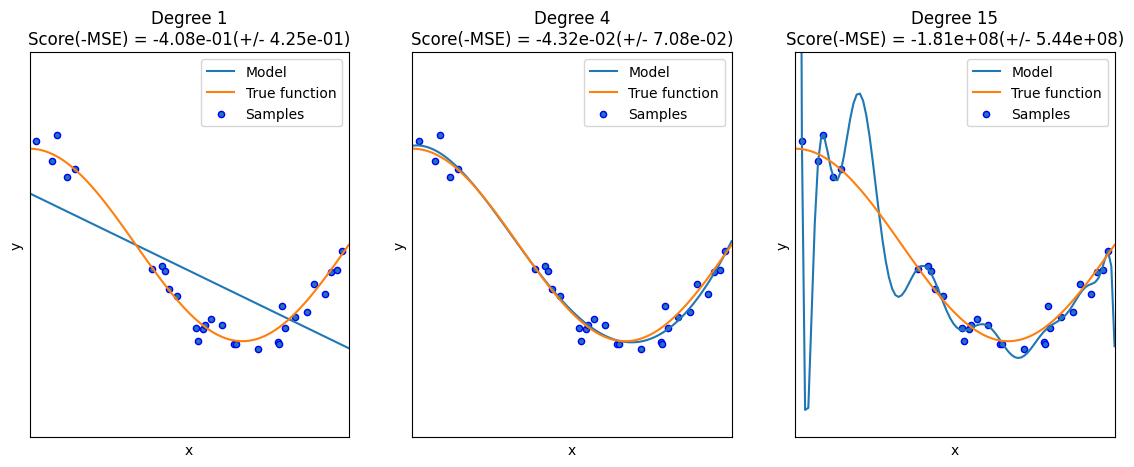

OK


In [4]:
# TODO: code review
#assert False, "TODO: remove me, and review this code"

# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]

print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)

    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])

    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))

    # CEF: loop added, prints each score per CV-fold.
    #      NOTICE the sub-means when degree=15!
    print(f"    CV sub-scores:  mean = {scores.mean():.2},  std = {scores.std():.2}")
    for i in range(len(scores)):
        print(f"      CV fold {i}  =>  score = {scores[i]:.2}")

plt.show()
print('OK')

In [ ]:
# TODO: code review..
assert False, "TODO: review in text"

### Qb) Explain the capacity and under/overfitting concept

Write a textual description of the capacity and under/overfitting concept using the plots in the code above.

What happens when the polynomial degree is low/medium/high with respect to under/overfitting  concepts? Explain in details.

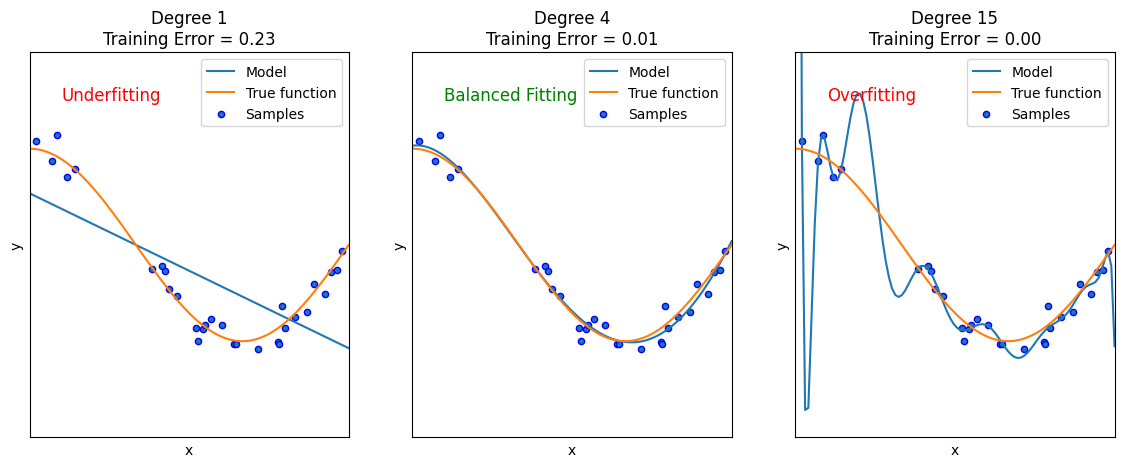

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples=30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)

    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])

    # Plotting details
    plt.plot(X_test, y_pred, label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")

    # Annotations for underfitting, balanced fitting, and overfitting
    if degrees[i] == 1:
        plt.annotate('Underfitting', xy=(0.1, 1.5), fontsize=12, color='red')
    elif degrees[i] == 4:
        plt.annotate('Balanced Fitting', xy=(0.1, 1.5), fontsize=12, color='green')
    elif degrees[i] == 15:
        plt.annotate('Overfitting', xy=(0.1, 1.5), fontsize=12, color='red')

    plt.title("Degree {}\nTraining Error = {:.2f}".format(degrees[i], np.mean((pipeline.predict(X[:, np.newaxis]) - y) ** 2)))

plt.show()


### Qc) Score method

Why is the scoring method called `neg_mean_squared_error` in the code?

Explain why we see a well known $J$-function, the $MSE$, is conceptually moving from being a cost-function to now be a score function, how can that be?

What happens if you try to set it to `mean_squared_error`, i.e. does it work or does it raise an exception, ala

```python
scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
```

Remember to document the outcome for Your journal.

What is the theoretical minimum and maximum score values (remember that the score range was $[-\infty;1]$ for the $r^2$ score). Why does the Degree 15 model have a `Score(-MSE) = -1.8E8`? And, why is this by no means the best model?

More on Score funs at

* https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# TODO: examine the score method..
assert False, "TODO: explain and test the neg_mean_squared_error in the code above"

REVISIONS||
:-|:-
2018-12-18| CEF, initial.
2018-02-14| CEF, major update.
2018-02-20| CEF, added code reference.
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, minor text updates, and made Qc optional.
2019-10-08| CEF, updated to ITMAL E19.
2020-03-14| CEF, updated to ITMAL F20.
2020-10-15| CEF, updated to ITMAL E20.
2021-10-29| CEF, changed sign of score(-MSE) for score=neg_mean_squared_error.
2021-10-04| CEF, update to ITMAL E21.
2022-03-25| CEF, updated to SWMAL F22.
2023-03-15| CEF, minor update to SWMAL F23.